In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


In [5]:
data = pd.read_csv('/content/drive/My Drive/Iris.csv')
data = data.drop(columns=['Id'])




In [6]:
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [7]:
data.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Separate features and target
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values   # The last column

In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)


In [40]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [83]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, validation_split=0.3,shuffle=True)

Epoch 1/300
3/3 [==============================] - 1s 104ms/step - loss: 4.0159 - accuracy: 0.4110 - val_loss: 3.5636 - val_accuracy: 0.3750
Epoch 2/300
3/3 [==============================] - 0s 26ms/step - loss: 3.8474 - accuracy: 0.3836 - val_loss: 3.5059 - val_accuracy: 0.3750
Epoch 3/300
3/3 [==============================] - 0s 17ms/step - loss: 3.8346 - accuracy: 0.2603 - val_loss: 3.4331 - val_accuracy: 0.3750
Epoch 4/300
3/3 [==============================] - 0s 26ms/step - loss: 3.5113 - accuracy: 0.3973 - val_loss: 3.3236 - val_accuracy: 0.3750
Epoch 5/300
3/3 [==============================] - 0s 17ms/step - loss: 3.4273 - accuracy: 0.4932 - val_loss: 3.2151 - val_accuracy: 0.4375
Epoch 6/300
3/3 [==============================] - 0s 17ms/step - loss: 3.4534 - accuracy: 0.3699 - val_loss: 3.1154 - val_accuracy: 0.5625
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 3.1931 - accuracy: 0.5205 - val_loss: 3.0209 - val_accuracy: 0.5938
Epoch 8/300
3/3 [==

In [85]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train accuracy: {train_accuracy}')

4/4 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.9524
Train accuracy: 0.9523809552192688


In [86]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

2/2 [==============================] - 0s 7ms/step - loss: 0.2928 - accuracy: 0.9333
Test accuracy: 0.9333333373069763


In [87]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

2/2 [==============================] - 0s 6ms/step
[1 0 2 1 1 0 1 2 1 1 1 0 0 0 0 1 2 1 1 2 0 1 0 2 1 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [88]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


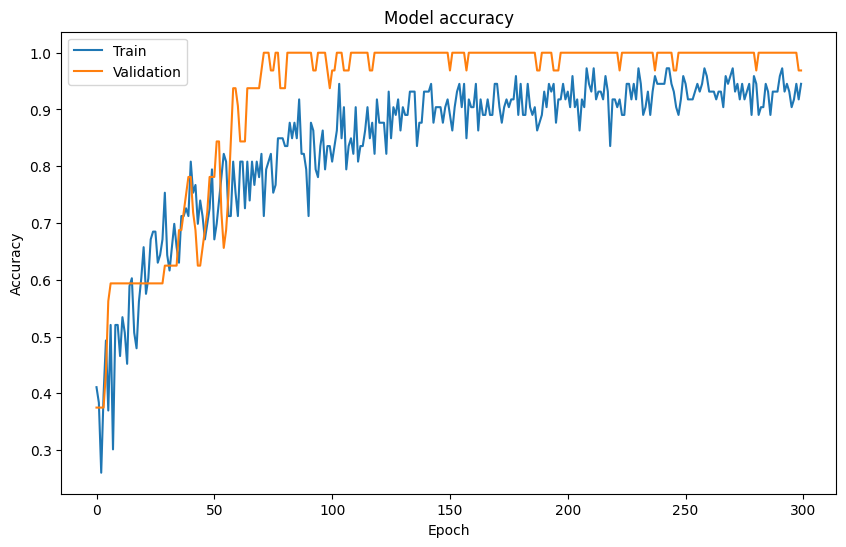

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [91]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 10ms/step


In [95]:
# Classification Report
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print('Classification Report:\n', class_report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.77      0.87        13

       accuracy                           0.93        45
      macro avg       0.94      0.92      0.92        45
   weighted avg       0.95      0.93      0.93        45

